# Загрузка Pandas и очистка данных

In [1120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt # для построения графиков

%matplotlib inline

In [1121]:
df = pd.read_csv('main_task.csv')

In [1122]:
df.head()

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [1123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


Приведем имена колонок к нормальному виду

In [1124]:
df.columns=['restaurant_id', 'city', 'cuisine_style', 'ranking', 'rating',
       'price_range', 'reviews_cnt', 'reviews', 'ta_url', 'ta_id']


### Общие наблюдения и очистки

In [1125]:
df.describe(include='all')

,restaurant_id,city,cuisine_style,ranking,rating,price_range,reviews_cnt,reviews,ta_url,ta_id
count,40000,40000,30717,40000.000000,40000.000000,26114,37457.000000,40000,40000,40000
unique,11909,31,9007,NaN,NaN,3,NaN,33516,39980,39980
top,id_227,London,['Italian'],NaN,NaN,$$ - $$$,NaN,"[[], []]",/Restaurant_Review-g187514-d7809594-Reviews-La...,d7342803
freq,18,5757,1032,NaN,NaN,18412,NaN,6471,2,2
mean,NaN,NaN,NaN,3676.028525,3.993037,NaN,124.825480,NaN,NaN,NaN
std,NaN,NaN,NaN,3708.749567,0.668417,NaN,295.666352,NaN,NaN,NaN
min,NaN,NaN,NaN,1.000000,1.000000,NaN,2.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,973.000000,3.500000,NaN,9.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,2285.000000,4.000000,NaN,33.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,5260.000000,4.500000,NaN,115.000000,NaN,NaN,NaN


Есть неуникальные _restaurant_id_ и _ta_id_

In [1126]:
df[df.restaurant_id==df.restaurant_id.value_counts().index[0]].head(3)



,restaurant_id,city,cuisine_style,ranking,rating,price_range,reviews_cnt,reviews,ta_url,ta_id
1065,id_227,Luxembourg,"['Lebanese', 'Mediterranean', 'Middle Eastern'...",228.0,4.0,$$ - $$$,21.0,"[['Nice little Lebanese restaurant', 'Great fo...",/Restaurant_Review-g190356-d10275783-Reviews-K...,d10275783
4727,id_227,Bratislava,"['Healthy', 'European', 'Mediterranean', 'Vege...",228.0,4.0,$$ - $$$,122.0,"[['Great fish (African sharptooth catfish)', '...",/Restaurant_Review-g274924-d4009959-Reviews-Me...,d4009959
6237,id_227,Athens,"['European', 'Greek', 'Mediterranean']",228.0,4.5,$$ - $$$,220.0,"[['Spectacular view and food', 'Great view'], ...",/Restaurant_Review-g189400-d1898490-Reviews-Ol...,d1898490


Одинаковый _restaurant_id_ встречается в разных городах и имеет разный _ta_id_. Удалим эту колонку.

In [1127]:
df.drop(["restaurant_id"], axis=1, inplace=True)

In [1128]:
with pd.option_context('display.max_colwidth', -1):
    print(df[df.ta_id==df.ta_id.value_counts().index[0]].head(3))

city                 cuisine_style  ranking  rating price_range  \
22924  Madrid  ['Spanish', 'Mediterranean']  2361.0   4.5     $$ - $$$     
36275  Madrid  ['Spanish', 'Mediterranean']  2469.0   4.5     $$ - $$$     

       reviews_cnt                                          reviews  \
22924  16.0         [['The real codido madrileño'], ['03/31/2017']]   
36275  16.0         [['The real codido madrileño'], ['03/31/2017']]   

                                                                    ta_url  \
22924  /Restaurant_Review-g187514-d7342803-Reviews-Los_Hierros-Madrid.html   
36275  /Restaurant_Review-g187514-d7342803-Reviews-Los_Hierros-Madrid.html   

          ta_id  
22924  d7342803  
36275  d7342803  


Судя по-всему дублирующиеся _ta_id_ отличаются только по _ranking_. Попробуем сгрупировать, при этом ранк возьмется случайно, что не страшно, т.к. дублей всего 20

In [1129]:
df.drop_duplicates(subset=['city', 'cuisine_style', 'rating','price_range', 'reviews_cnt', 'reviews', 'ta_url', 'ta_id'], inplace=True, ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39980 entries, 0 to 39979
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   city           39980 non-null  object 
 1   cuisine_style  30701 non-null  object 
 2   ranking        39980 non-null  float64
 3   rating         39980 non-null  float64
 4   price_range    26101 non-null  object 
 5   reviews_cnt    37437 non-null  float64
 6   reviews        39980 non-null  object 
 7   ta_url         39980 non-null  object 
 8   ta_id          39980 non-null  object 
dtypes: float64(3), object(6)
memory usage: 2.7+ MB


Теперь количество строк совпадает с уникальными значениями _ta_id_ т.е. его можно использовать как первичный ключ для дальнейших очисток

### Вынос общих функций

In [1130]:
import ast

def text_to_dct(json_text):
    #return json.loads(json_text.replace('\'','\"')) This does not work for tricky cases with " and ' used for quotes in parallel
    return ast.literal_eval(json_text.replace('nan','\'\''))

### Исследование  price_range

In [1131]:
df.price_range.value_counts()

$$ - $$$    18402
$            6276
$$$$         1423
Name: price_range, dtype: int64

Это ординальный признак, но есть пропуски. Преобразуем в числа.

In [1132]:
dct = {'$$ - $$$': 2, '$': 1, '$$$$': 3}
df.price_range.replace(to_replace=dct, inplace=True)

Пропуски заполним наиболее частым значением (2), т.к. оно более вероятно

In [1133]:
df.price_range.fillna(2, inplace=True)

### Исследование и очистка city

In [1134]:
df.city.describe()

count      39980
unique        31
top       London
freq        5757
Name: city, dtype: object

### Исследование и очистка cuisine

Сделаем вспомогательный датафрейм

In [1135]:
cuisines = df[["ta_id","cuisine_style"]]

In [1136]:

cuisines.cuisine_style.fillna('["Unknown"]', inplace=True)
cuisines.cuisine_style = cuisines.cuisine_style.apply(text_to_dct)

Преобразуем массив кухонь в отдельный ряд на кухню для каждого ресторана

In [1137]:
cuisines = cuisines.explode("cuisine_style")
cuisines.describe()

,ta_id,cuisine_style
count,104843,104843
unique,39980,126
top,d7231902,Vegetarian Friendly
freq,21,11183


Число уникальных кухонь - 126, но без учета добавленной Unknown - 125

Самые популярные кухни:

In [1138]:
cuisines.cuisine_style.value_counts()


Vegetarian Friendly    11183
European               10056
Unknown                 9279
Mediterranean           6271
Italian                 5963
                       ...  
Xinjiang                   1
Salvadoran                 1
Yun                        1
Latvian                    1
Burmese                    1
Name: cuisine_style, Length: 126, dtype: int64

Среднее число кухонь на ресторан:

In [1139]:
cuisines.groupby("ta_id").nunique().mean()

ta_id            1.000000
cuisine_style    2.622386
dtype: float64

Добавим фичу с колличеством кухонь на ресторан в основной датасет

In [1140]:
cuisine_cnt_df = cuisines.groupby("ta_id").nunique()
cuisine_cnt_df.columns=["ta_id","cuisines_cnt"]
cuisine_cnt_df = cuisine_cnt_df[["cuisines_cnt"]].reset_index()
cuisine_cnt_df
df=df.merge(cuisine_cnt_df, how="left", on="ta_id")
df.head(3)

,city,cuisine_style,ranking,rating,price_range,reviews_cnt,reviews,ta_url,ta_id,cuisines_cnt
0,Paris,"['European', 'French', 'International']",5570.0,3.5,2.0,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,3
1,Stockholm,NaN,1537.0,4.0,2.0,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,1
2,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,3.0,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,7


Развернем данные по кухням, взяв только топ 25\* кухонь. 

\*Проверено опытным путем что большее количество уже незначительно влияет на ошибку модели

In [1141]:
top_kitchens = cuisines.cuisine_style.value_counts()[:25].index 
cuisines.cuisine_style=cuisines["cuisine_style"].apply(lambda c: c if c in top_kitchens else 'other')

In [1142]:
cuisines=pd.get_dummies(cuisines,columns=["cuisine_style"]).groupby("ta_id").sum()

Смерджим с основным датасетом

In [1143]:
df=df.merge(cuisines, how="left", on="ta_id")
df.drop("cuisine_style", axis=1, inplace=True)
df.head(3)

,city,ranking,rating,price_range,reviews_cnt,reviews,ta_url,ta_id,cuisines_cnt,cuisine_style_American,...,cuisine_style_Pizza,cuisine_style_Portuguese,cuisine_style_Pub,cuisine_style_Seafood,cuisine_style_Spanish,cuisine_style_Sushi,cuisine_style_Unknown,cuisine_style_Vegan Options,cuisine_style_Vegetarian Friendly,cuisine_style_other
0,Paris,5570.0,3.5,2.0,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,3,0,...,0,0,0,0,0,0,0,0,0,0
1,Stockholm,1537.0,4.0,2.0,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,1,0,...,0,0,0,0,0,0,1,0,0,0
2,London,353.0,4.5,3.0,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,7,0,...,0,0,0,0,0,1,0,1,1,1


### Работа с отзывами

In [1144]:
reviews = df[["ta_id","reviews"]]
reviews.reviews = reviews.reviews.apply(text_to_dct)


Анализируем сколько бывает отзывов

In [1145]:
reviews.reviews.apply(lambda r: len(r[0])).value_counts(),reviews.reviews.apply(lambda r: len(r[1])).value_counts()

(2    28961
 0     6465
 1     4554
 Name: reviews, dtype: int64,
 2    28961
 0     6465
 1     4554
 Name: reviews, dtype: int64)

Видно что количество дат отзывов скорее всего совпадает с количеством отзывов, несмотря на то что хранится в отдельном массиве. Нужен как анализ конкретных ревью, так и их дат. Вынесем в отдельные колонки

In [1146]:
reviews["review_2"]=reviews.reviews.apply(lambda r: r[0][0] if len(r[0])>0 else None)
reviews["review_2_date"]=pd.to_datetime(reviews.reviews.apply(lambda r: r[1][0] if len(r[1])>0 else None))
reviews["review_1"]=reviews.reviews.apply(lambda r: r[0][1] if len(r[0])>1 else None)
reviews["review_1_date"]=pd.to_datetime(reviews.reviews.apply(lambda r: r[1][1] if len(r[1])>1 else None))
reviews.drop(["reviews"], axis=1, inplace=True)
reviews.describe()

,ta_id,review_2,review_2_date,review_1,review_1_date
count,39980,33515,33515,28961,28961
unique,39980,28613,1880,24756,1951
top,d7394137,Excellent,2018-01-07 00:00:00,Excellent,2018-01-03 00:00:00
freq,1,118,486,86,194
first,NaN,NaN,2004-04-21 00:00:00,NaN,2007-11-14 00:00:00
last,NaN,NaN,2018-02-26 00:00:00,NaN,2018-02-26 00:00:00


In [1147]:

print("Максимальное количество дней между ревью", (reviews.review_2_date-reviews.review_1_date).dt.days.max())
#reviews["days_between_reviews"].fillna(reviews.days_between_reviews.max()+1000, inplace=True)

Максимальное количество дней между ревью 3207.0


Вероятно данные вбивались некорректно, т.к. самый старый второй отзыв раньше самого старого первого. Постараемся удалить выбросы

In [1148]:
#reviews.review_1_date.dt.year.hist()
#print(reviews.review_1_date.dt.year.quantile([0.01,0.99]))

In [1149]:
#reviews.review_2_date.dt.year.hist()
#print(reviews.review_2_date.dt.year.quantile([0.01,0.99]))


In [1150]:
#reviews = reviews[(np.isnat(reviews.review_1_date) | (reviews.review_1_date.dt.year>=2012)) & (np.isnat(reviews.review_1_date) | (reviews.review_2_date.dt.year>=2013))]

На основе дат введем два признака: Сколько прошло с последнего отзыва и как часто люди ревьюят ресторан. 

In [1151]:
today=max(reviews.review_1_date.max(),reviews.review_2_date.max())
reviews["days_since_last_review"]=(today-reviews[["review_1_date","review_2_date"]].max(axis=1)).dt.days
reviews["days_between_reviews"]=(np.abs(reviews.review_2_date - reviews.review_1_date)).dt.days

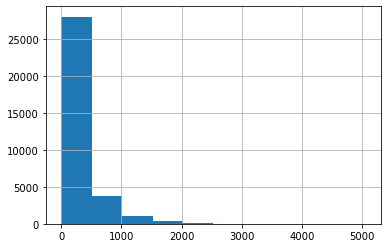

In [1152]:
reviews.days_since_last_review.hist()

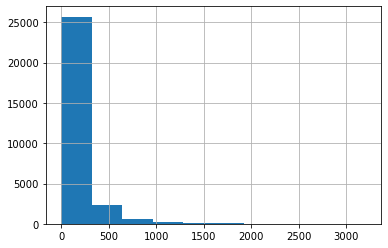

In [1153]:
reviews.days_between_reviews.hist()

Установим порог по 10й персентили в этих признаках и заменим запороговые значения максимумом (гипотеза чем больше дней тем "хуже" ревью)

In [1154]:
days_between_reviews_threshold = reviews.days_between_reviews.quantile(0.90)
reviews[reviews.days_between_reviews>days_between_reviews_threshold].days_between_reviews = days_between_reviews_threshold

days_since_last_review_threshold = reviews.days_since_last_review.quantile(0.90)
reviews[reviews.days_since_last_review>days_since_last_review_threshold].days_since_last_review = days_since_last_review_threshold

Также заменим пропуски теми же пороговыми значениями 

In [1155]:
reviews.days_between_reviews.fillna(days_between_reviews_threshold, inplace=True)
reviews.days_since_last_review.fillna(days_since_last_review_threshold, inplace=True)
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39980 entries, 0 to 39979
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ta_id                   39980 non-null  object        
 1   review_2                33515 non-null  object        
 2   review_2_date           33515 non-null  datetime64[ns]
 3   review_1                28961 non-null  object        
 4   review_1_date           28961 non-null  datetime64[ns]
 5   days_since_last_review  39980 non-null  float64       
 6   days_between_reviews    39980 non-null  float64       
dtypes: datetime64[ns](2), float64(2), object(3)
memory usage: 2.4+ MB


In [1158]:
df=df.merge(reviews[["ta_id","days_since_last_review","days_between_reviews"]], how="left", on="ta_id")
df.drop("reviews", axis=1, inplace=True)
df.head(3)

,city,ranking,rating,price_range,reviews_cnt,ta_url,ta_id,cuisines_cnt,cuisine_style_American,cuisine_style_Asian,...,cuisine_style_Pub,cuisine_style_Seafood,cuisine_style_Spanish,cuisine_style_Sushi,cuisine_style_Unknown,cuisine_style_Vegan Options,cuisine_style_Vegetarian Friendly,cuisine_style_other,days_since_last_review,days_between_reviews
0,Paris,5570.0,3.5,2.0,194.0,/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,3,0,0,...,0,0,0,0,0,0,0,0,57.0,41.0
1,Stockholm,1537.0,4.0,2.0,10.0,/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,1,0,0,...,0,0,0,0,1,0,0,0,235.0,382.0
2,London,353.0,4.5,3.0,688.0,/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,7,0,1,...,0,0,0,1,0,1,1,1,49.0,2.0


In [1159]:
df = df.drop([c for c in df.columns if df[c].dtype == 'object'], axis = 1) # Drop non-numbers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ranking            40000 non-null  float64
 1   Rating             40000 non-null  float64
 2   Number of Reviews  40000 non-null  float64
dtypes: float64(3)
memory usage: 937.6 KB


In [1160]:
df["reviews_cnt"].fillna(df["reviews_cnt"].median(), inplace=True)

# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [1161]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = df.drop([ 'rating'], axis = 1)
y = df['rating']

In [1162]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [1163]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Создаём, обучаем и тестируем модель

In [1164]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [1165]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

In [1166]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.36133536291955504
